In [22]:
#import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#Load Fashion mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Descriptive statistics

In [24]:
#Class distribution in training set / test set
train_dist = np.zeros(10)
test_dist = np.zeros(10)
first_image = []
for i in train_labels:
  train_dist[i] += 1

for i in test_labels:
  test_dist[i] += 1
print("Number of each class in Training Set:",train_dist)
print("Number of each class in Testing Set:",test_dist)

Number of each class in Training Set: [6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]
Number of each class in Testing Set: [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


In [25]:
train_images = train_images / 255.0
test_images = test_images / 255.0

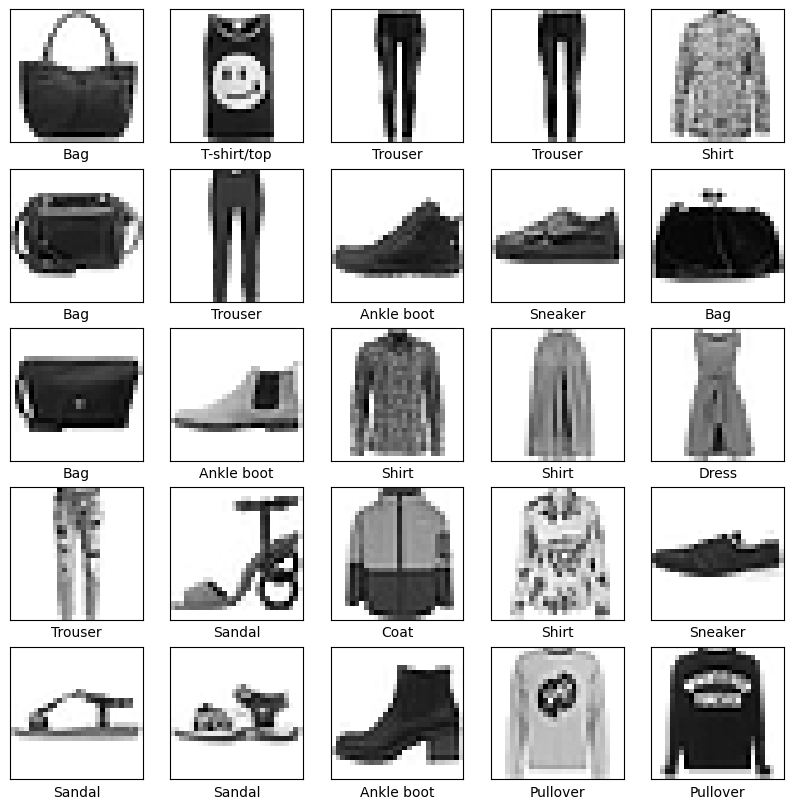

In [26]:
# Show the first 25 image and the respective class name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+100], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i+100]])
plt.show()
plt.close()

In [27]:
#next, apply linear translation to the grayscale value of each pixel, ensure it to falls in [-1,1]
dummy = []
for image in train_images:
  dummy.append(np.reshape(image,(28*28)))
transform = np.array(dummy)
for idx,image in enumerate(transform):
  transform[idx]=(image-.5)*2

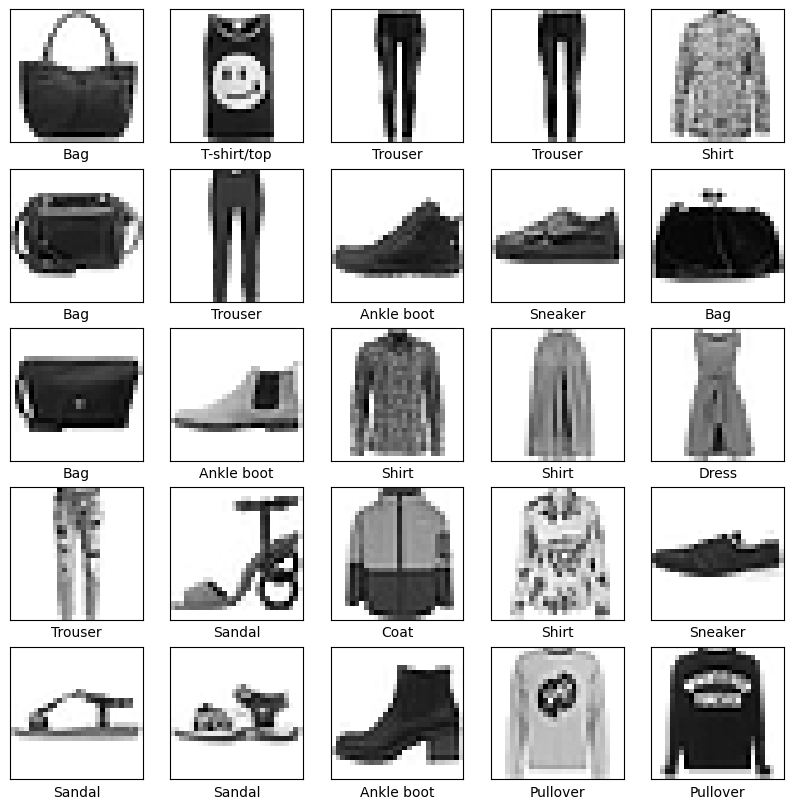

In [28]:
#the translation does not affect the image, the purpose is to ensure better parameter learning for CNN
#we show the same set of picture after such translation to prove it
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(transform[i+100].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i+100]])
plt.show()
plt.close()

PCA

In [29]:
from sklearn.decomposition import PCA

In [30]:
#In this part, we treat each pixel as a feature of image, and preform PCA to reduce the original images (28*28) dimension, into 3 dimension vecotors
pca = PCA(n_components=3)
pca.fit(np.transpose(transform))

PCA(n_components=3)

In [31]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_.shape)

[0.41549564 0.147025   0.06255408]
[2915.62489816 1734.37898934 1131.2959268 ]
(3, 60000)


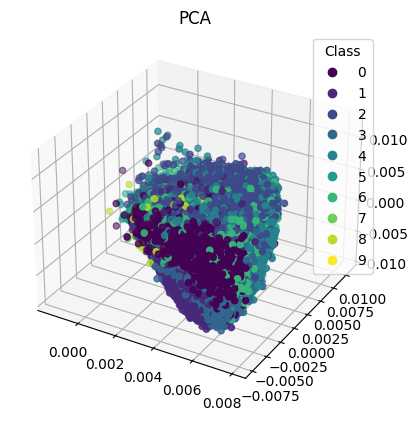

In [32]:
x = pca.components_[0,:]
y = pca.components_[1,:]
z = pca.components_[2,:]
fig = plt.figure()
ax= fig.add_subplot(111,projection='3d')
sc = ax.scatter(x,y,z,c=train_labels)
ax.legend(*sc.legend_elements(),title="Class")
ax.set_title("PCA")
plt.show()
plt.close()

TSNE

In [33]:
from sklearn.manifold import TSNE

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto', perplexity=20).fit_transform(transform)

In [ ]:
print(X_embedded.shape)

In [ ]:
fig,ax = plt.subplots()
x = X_embedded[:,0]
y = X_embedded[:,1]
sc = ax.scatter(x,y,c=train_labels)
ax.legend(*sc.legend_elements(),title="Class Label")
ax.set_title("t-SNE")
plt.show()

Experiment : eigan-image

In [ ]:
pca = PCA(n_components=10)
pca.fit(transform)

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(pca.components_[i].reshape((28,28)), cmap=plt.cm.binary)
plt.show()
plt.close()